In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import DataFarme
df = pd.read_csv("https://raw.githubusercontent.com/Immobilienrechner-Challenge/data/main/immoscout_cleaned_lat_lon_fixed_v9.csv")

# print head of DataFrame
display(df.head(1))

# filter for columns with dtype object
df_objects = df[df.select_dtypes(include=['object']).columns]

# get every column name with dtype object and save it in a list
df_objects_list = df_objects.columns.tolist()

# display df_objects_list
print(df_objects_list)

# print len of df_objects_list
print(len(df_objects_list))

# create empty list for dropping the coloumn names in the future
drop_list = []


C:\Users\Si Ben Tran\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,price_cleaned,type,Space extracted,rooms
0,0,0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,...,2.234259,5.89,14.0,9.0,308.0,331.0,1150000.0,penthouse,100.0,5.0


['Municipality', 'Living space', 'Plot area', 'Floor space', 'Availability', 'location', 'description', 'detailed_description', 'url', 'table', 'Floor', 'detail_responsive#municipality', 'detail_responsive#surface_living', 'detail_responsive#floor', 'detail_responsive#available_from', 'Gemeinde', 'Wohnfläche', 'Stockwerk', 'Nutzfläche', 'Verfügbarkeit', 'Grundstücksfläche', 'detail_responsive#surface_property', 'detail_responsive#surface_usable', 'Commune', 'Surface habitable', 'Surface du terrain', 'Surface utile', 'Disponibilité', 'Étage', 'Comune', 'Superficie abitabile', 'Disponibilità', 'Gross return', 'Piano', 'Superficie del terreno', 'Superficie utile', 'Municipality_merged', 'Floor_merged', 'Living_space_merged', 'Floor_space_merged', 'Plot_area_merged', 'Availability_merged', 'location_parsed', 'title', 'details', 'address', 'price', 'link', 'details_structured', 'Locality', 'type']
51


In [3]:
# selecting Availability, descirption, detailed_description, url, table, detail_responsive#available_from\
# Verfügbarkeit, Disponsibilité, Disponsibilità, Gross return, Piano, Availbility_merged, title, link, \
# type

# create avability list
avability_list = ['Availability', 'detail_responsive#available_from', 'Verfügbarkeit', \
                'Disponibilité', 'Disponibilità']

# create json list
json_cols = ['details_structured']

# other categorical list
other_list = ['url', 'table', 'Gross return', 'Piano', 'title', 'link', 'type']

# Availbility

,Availability,detail_responsive#available_from,Verfügbarkeit,Disponibilité,Disponibilità
0,On request,NaN,NaN,NaN,NaN
1,On request,NaN,NaN,NaN,NaN
2,NaN,Immediately,NaN,NaN,NaN
3,On request,NaN,NaN,NaN,NaN
4,On request,NaN,NaN,NaN,NaN
5,On request,NaN,NaN,NaN,NaN
6,Immediately,NaN,NaN,NaN,NaN
7,On request,NaN,NaN,NaN,NaN
8,On request,NaN,NaN,NaN,NaN
9,On request,NaN,NaN,NaN,NaN


Availability 715
detail_responsive#available_from 12918
Verfügbarkeit 13218
Disponibilité 13311
Disponibilità 13350


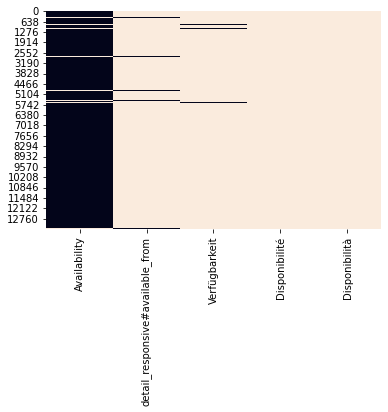

In [4]:
# selecting all coloumns with availbility_list
df_availability = df[avability_list]

# display the dataframe
display(df_availability.head(10))

# Iterate thorugh every coloumn and the get number of Na Values
for col in df_availability.columns:
    print(col, df_availability[col].isna().sum())

# create isna heatmap
sns.heatmap(df_availability.isna(), cbar=False)
plt.show()

In [5]:
# create a coloumn and save the value of the coloumn with the most values
df_availability['avability_merged'] = df_availability[avability_list].apply(lambda x: x.dropna().values[0], axis=1)

# display the dataframe
display(df_availability.tail(2))

# get all unique values of the coloumn avability_merged
print(df_availability['avability_merged'].unique())

# check if there is an na value in availbility_merged
print(df_availability['avability_merged'].isna().sum())


<ipython-input-5-429af6696bbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_availability['avability_merged'] = df_availability[avability_list].apply(lambda x: x.dropna().values[0], axis=1)


,Availability,detail_responsive#available_from,Verfügbarkeit,Disponibilité,Disponibilità,avability_merged
13376,Immediately,NaN,NaN,NaN,NaN,Immediately
13377,Immediately,NaN,NaN,NaN,NaN,Immediately


['On request' 'Immediately' '30.12.2022' '01.12.2022' '01.04.2023'
 '01.08.2023' '01.10.2022' '01.11.2022' '01.09.2023' '01.07.2023'
 '07.07.2023' '22.10.2022' '01.02.2023' '01.06.2023' '31.10.2023'
 '01.01.2023' '01.05.2023' '01.12.2023' '01.10.2023' '30.11.2022'
 '31.12.2023' '20.03.2023' '19.01.2024' '01.03.2023' '01.05.2024'
 '15.08.2023' '31.12.2022' '31.03.2023' '30.06.2024' '01.02.2024'
 '31.07.2023' '02.01.2023' '15.10.2022' '11.11.2022' '30.11.2023'
 '01.04.2024' '01.12.2024' '30.09.2022' '01.04.2025' '01.10.2024'
 '01.07.2024' '01.11.2024' '15.12.2022' '01.06.2024' '01.01.2024'
 '01.11.2023' '25.01.2024' '24.06.2023' '26.10.2022' '28.02.2023'
 '15.09.2022' '30.09.2023' '30.01.2024' '03.04.2023' '15.02.2024'
 '01.04.2030' '30.04.2023' '05.09.2022' '03.10.2022' '31.05.2024'
 '31.05.2023' '31.03.2024' '30.12.2023' '16.12.2022' '07.11.2022'
 '05.02.2024' '30.10.2023' '31.10.2022' '21.10.2023' '16.09.2022'
 '31.08.2023' '01.03.2025' '15.12.2023' '20.04.2023' '17.10.2022'
 '17.12.2

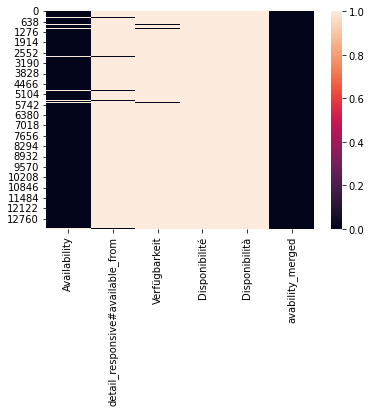

In [6]:
# create isna heatmap
sns.heatmap(df_availability.isna(), cbar=True)
plt.show()

In [7]:
# create a dataframe with the number of unique values in availbility_merged
df_availability_merged = df_availability['avability_merged'].value_counts().to_frame()

# display the dataframe
display(df_availability_merged.head(2))


,avability_merged
On request,9650
Immediately,2647


### Function for availability

In [8]:
# create a function for the availbility_merged
def availability_merged(df):
    '''
    This funktion takes a dataframe and selects all the availability coloumns and merges them into one coloumn.
    Also drops the used coloumns and returns a dataframe.

    df: pd.DataFrame (Our immo raw csv file)
    '''
    
    # create a list for the availabilty_merged
    col = ['Availability', 'detail_responsive#available_from', 'Verfügbarkeit', 'Disponibilité', 'Disponibilità']

    # create a coloumn and save the value of the coloumn with the most values
    df['avability_merged'] = df[col].apply(lambda x: x.dropna().values[0], axis=1)

    # drop the coloumns
    df.drop(col, axis=1, inplace=True)

    # return the dataframe
    return df

    

In [9]:
# testing function
df_test_avail = availability_merged(df)

# display the dataframe 
display(df_test_avail.iloc[: , -3:].head(3))


,Space extracted,rooms,avability_merged
0,100.0,5.0,On request
1,156.0,5.0,On request
2,93.0,5.0,Immediately
